## Revision History

Update with your details here

Name: Amit Datta Banik

Date: 29/11/2021

## Basic problem statement 
Explore, understand and build on what factors influence energy consumption – for appliances and light - using the provided data for a house in Belgium. 

If it is feasible and/or required to build a model 
- can you outline the approach, 
- build a proof of concept model with the available data and 
- architect a scenario where/how the model could be used. 

Please answer below questions based on your understanding
- How can we improve this perceived system?
- what challenges do you see in deploying this system?
- can you propose a timeline based on this PoC for this development?

Please use the notebook to record your thought process and code. Once you have performed the assessment, respond back with your solution in 5 days. You will be required to walk through the notebook in a technical discussion. 

A basic workflow is defined via code comments, which you may use. Please ensure to include your references in the last cell. 

## Data Set Information

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column.

Data repository : [link](http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv)

## Attribute Information
* date : time year-month-day hour:minute:second
* Appliances, energy use in Wh 
* lights, energy use of light fixtures in the house in Wh 
* T1, Temperature in kitchen area, in Celsius 
* RH_1, Humidity in kitchen area, in % 
* T2, Temperature in living room area, in Celsius 
* RH_2, Humidity in living room area, in % 
* T3, Temperature in laundry room area 
* RH_3, Humidity in laundry room area, in % 
* T4, Temperature in office room, in Celsius 
* RH_4, Humidity in office room, in % 
* T5, Temperature in bathroom, in Celsius 
* RH_5, Humidity in bathroom, in % 
* T6, Temperature outside the building (north side), in Celsius 
* RH_6, Humidity outside the building (north side), in % 
* T7, Temperature in ironing room , in Celsius 
* RH_7, Humidity in ironing room, in % 
* T8, Temperature in teenager room 2, in Celsius 
* RH_8, Humidity in teenager room 2, in % 
* T9, Temperature in parents room, in Celsius 
* RH_9, Humidity in parents room, in % 
* To, Temperature outside (from Chievres weather station), in Celsius 
* Pressure (from Chievres weather station), in mm Hg 
* RH_out, Humidity outside (from Chievres weather station), in % 
* Wind speed (from Chievres weather station), in m/s 
* Visibility (from Chievres weather station), in km 
* Tdewpoint (from Chievres weather station), in Deg C

In [1]:
## The libraries you use

In [5]:
# Uncomment and run if any of the following libraries not available
!pip install tqdm
!pip install missingno
!pip install --user pandas_profiling
!pip install --user folium
!pip install pivottablejs

  Using cached https://files.pythonhosted.org/packages/b8/bb/7d1a8523711c7022601d17a8449b822dc5ffaf272692d3538771b0538631/pandas_profiling-3.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/55/85/70c6602b078bd9e6f3da4f467047e906525c355a4dacd4f71b97a35d9897/joblib-1.0.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/63/f3/b7a1b8e40fd1bd049a34566eb353527bb9b8e9b98f8b6cf803bb64d8ce95/tqdm-4.62.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/92/96/144f70b972a9c0eabbd4391ef93ccd49d0f2747f4f6a2a2738e99e5adc65/requests-2.26.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1b/f6/f774e745edd76eef70bf83062823be0dca95ee9c9211f18aec490892ab33/MarkupSafe-2.0.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/5b/94/bfe9a0f68152118e805bdada61eb1259cd703f9d4bab747495aacce7af1d/multimethod-1.6-py3-none-any.whl
  Using cached https://files.pythonhosted.org/pac

spacy 2.0.12 has requirement regex==2017.4.5, but you'll have regex 2018.7.11 which is incompatible.
flair 0.4.0 has requirement matplotlib==3.0.0, but you'll have matplotlib 3.2.2 which is incompatible.
flair 0.4.0 has requirement torch==1.0.0, but you'll have torch 1.4.0 which is incompatible.
flair 0.4.0 has requirement tqdm==4.26.0, but you'll have tqdm 4.62.3 which is incompatible.
phik 0.12.0 has requirement scipy>=1.5.2, but you'll have scipy 1.5.0 which is incompatible.
  The script tqdm.exe is installed in 'C:\Users\Amit Datta Banik\AppData\Roaming\Python\Python37\Scripts' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  The script normalizer.exe is installed in 'C:\Users\Amit Datta Banik\AppData\Roaming\Python\Python37\Scripts' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  The script htmlmin.ex

In [28]:
!pip install pandas-profiling
!pip install setuptools

In [1]:
!pip install  MarkupSafe==2.0.1

In [2]:
from markupsafe import Markup, escape

In [6]:
# To output plotting commands display inline within frontends
%matplotlib inline
#To obtain retina-display quality for figures into code
%config InlineBackend.figure_format='retina'

# To use features which will appear in newer versions while having an older release of Python
#from __future__ import absolute_import, division, print_function

# Plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
sns.set_context("poster", font_scale=1.3)
import folium

# Basic Wrangling 
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

# System Packages 
import os, sys
import warnings
warnings.filterwarnings('ignore')

# EDA Tools 
import missingno as msno
import pandas_profiling
import pivottablejs

#from tqdm import tqdm
from sklearn.datasets import make_blobs
import time

# More Technical EDA
import sklearn
import scipy



In [12]:
## Read data and basic data clean-up

In [8]:
# Loading the data from the Case Study GitHub
# df = pd.read_csv("https://raw.githubusercontent.com/eklavyasaxena/Advances-in-Data-Sciences-and-Architecture/master/ADS_CaseStudy_2/Data_for_EnergyCaseStudy/energydata_complete.csv")
df_loaded = pd.read_csv("./energydata_complete.csv")
df = df_loaded

In [9]:
df.shape

(19735, 29)

In [10]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [11]:
df.describe().T

count        mean         std         min         25%  \
Appliances   19735.0   97.694958  102.524891   10.000000   50.000000   
lights       19735.0    3.801875    7.935988    0.000000    0.000000   
T1           19735.0   21.686571    1.606066   16.790000   20.760000   
RH_1         19735.0   40.259739    3.979299   27.023333   37.333333   
T2           19735.0   20.341219    2.192974   16.100000   18.790000   
RH_2         19735.0   40.420420    4.069813   20.463333   37.900000   
T3           19735.0   22.267611    2.006111   17.200000   20.790000   
RH_3         19735.0   39.242500    3.254576   28.766667   36.900000   
T4           19735.0   20.855335    2.042884   15.100000   19.530000   
RH_4         19735.0   39.026904    4.341321   27.660000   35.530000   
T5           19735.0   19.592106    1.844623   15.330000   18.277500   
RH_5         19735.0   50.949283    9.022034   29.815000   45.400000   
T6           19735.0    7.910939    6.090347   -6.065000    3.626667   
RH_6         19735.0   54.609083   31.149806    1.000000   30.025000   
T7           19735.0   20.267106    2.109993   15.390000   18.700000   
RH_7         19735.0   35.388200    5.114208   23.200000   31.500000   
T8           19735.0   22.029107    1.956162   16.306667   20.790000   
RH_8         19735.0   42.936165    5.224361   29.600000   39.066667   
T9           19735.0   19.485828    2.014712   14.890000   18.000000   
RH_9         19735.0   41.552401    4.151497   29.166667   38.500000   
T_out        19735.0    7.411665    5.317409   -5.000000    3.666667   
Press_mm_hg  19735.0  755.522602    7.399441  729.300000  750.933333   
RH_out       19735.0   79.750418   14.901088   24.000000   70.333333   
Windspeed    19735.0    4.039752    2.451221    0.000000    2.000000   
Visibility   19735.0   38.330834   11.794719    1.000000   29.000000   
Tdewpoint    19735.0    3.760707    4.194648   -6.600000    0.900000   
rv1          19735.0   24.988033   14.496634    0.005322   12.497889   
rv2          19735.0   24.988033   14.496634    0.005322   12.497889   

                    50%         75%          max  
Appliances    60.000000  100.000000  1080.000000  
lights         0.000000    0.000000    70.000000  
T1            21.600000   22.600000    26.260000  
RH_1          39.656667   43.066667    63.360000  
T2            20.000000   21.500000    29.856667  
RH_2          40.500000   43.260000    56.026667  
T3            22.100000   23.290000    29.236000  
RH_3          38.530000   41.760000    50.163333  
T4            20.666667   22.100000    26.200000  
RH_4          38.400000   42.156667    51.090000  
T5            19.390000   20.619643    25.795000  
RH_5          49.090000   53.663333    96.321667  
T6             7.300000   11.256000    28.290000  
RH_6          55.290000   83.226667    99.900000  
T7            20.033333   21.600000    26.000000  
RH_7          34.863333   39.000000    51.400000  
T8            22.100000   23.390000    27.230000  
RH_8          42.375000   46.536000    58.780000  
T9            19.390000   20.600000    24.500000  
RH_9          40.900000   44.338095    53.326667  
T_out          6.916667   10.408333    26.100000  
Press_mm_hg  756.100000  760.933333   772.300000  
RH_out        83.666667   91.666667   100.000000  
Windspeed      3.666667    5.500000    14.000000  
Visibility    40.000000   40.000000    66.000000  
Tdewpoint      3.433333    6.566667    15.500000  
rv1           24.897653   37.583769    49.996530  
rv2           24.897653   37.583769    49.996530

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [14]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', utc=True)

In [15]:
all_columns = df.columns.tolist()
all_columns

['date',
 'Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

In [3]:
#Variables, Description	Units	Number of Features
#NSM, Number of seconds from midnight
#week_status, Week status (weekend (0) or a weekday (1))	Factor/categorical	30
#day_of_week, Day of week (Monday(0), Tuesday(1)… Sunday(6))	Factor/categorical	31

In [16]:
df['NSM'] = df.date.apply(lambda x: x.hour*3600 + x.minute*60 +x.second)
df['day_of_week'] = df.date.apply(lambda x: x.dayofweek)
df['week_status'] = df.day_of_week.apply(lambda x: 0 if (x == 5 or x == 6) else 1)

In [17]:
# Checking if the date column is unique for each and every row:
df.date.nunique() == df.shape[0]

True

In [ ]:
## strategy for missing value treatmen

In [18]:
# Checking Null Values
df.apply(lambda x: sum(x.isnull()), axis=0)

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
day_of_week    0
week_status    0
dtype: int64

In [19]:
df.head()

date  Appliances  lights     T1       RH_1    T2  \
0 2016-01-11 17:00:00+00:00          60      30  19.89  47.596667  19.2   
1 2016-01-11 17:10:00+00:00          60      30  19.89  46.693333  19.2   
2 2016-01-11 17:20:00+00:00          50      30  19.89  46.300000  19.2   
3 2016-01-11 17:30:00+00:00          50      40  19.89  46.066667  19.2   
4 2016-01-11 17:40:00+00:00          60      40  19.89  46.333333  19.2   

        RH_2     T3       RH_3         T4  ...  Press_mm_hg  RH_out  \
0  44.790000  19.79  44.730000  19.000000  ...        733.5    92.0   
1  44.722500  19.79  44.790000  19.000000  ...        733.6    92.0   
2  44.626667  19.79  44.933333  18.926667  ...        733.7    92.0   
3  44.590000  19.79  45.000000  18.890000  ...        733.8    92.0   
4  44.530000  19.79  45.000000  18.890000  ...        733.9    92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2    NSM  day_of_week  \
0   7.000000   63.000000        5.3  13.275433  13.275433  61200            0   
1   6.666667   59.166667        5.2  18.606195  18.606195  61800            0   
2   6.333333   55.333333        5.1  28.642668  28.642668  62400            0   
3   6.000000   51.500000        5.0  45.410389  45.410389  63000            0   
4   5.666667   47.666667        4.9  10.084097  10.084097  63600            0   

   week_status  
0            1  
1            1  
2            1  
3            1  
4            1  

[5 rows x 32 columns]

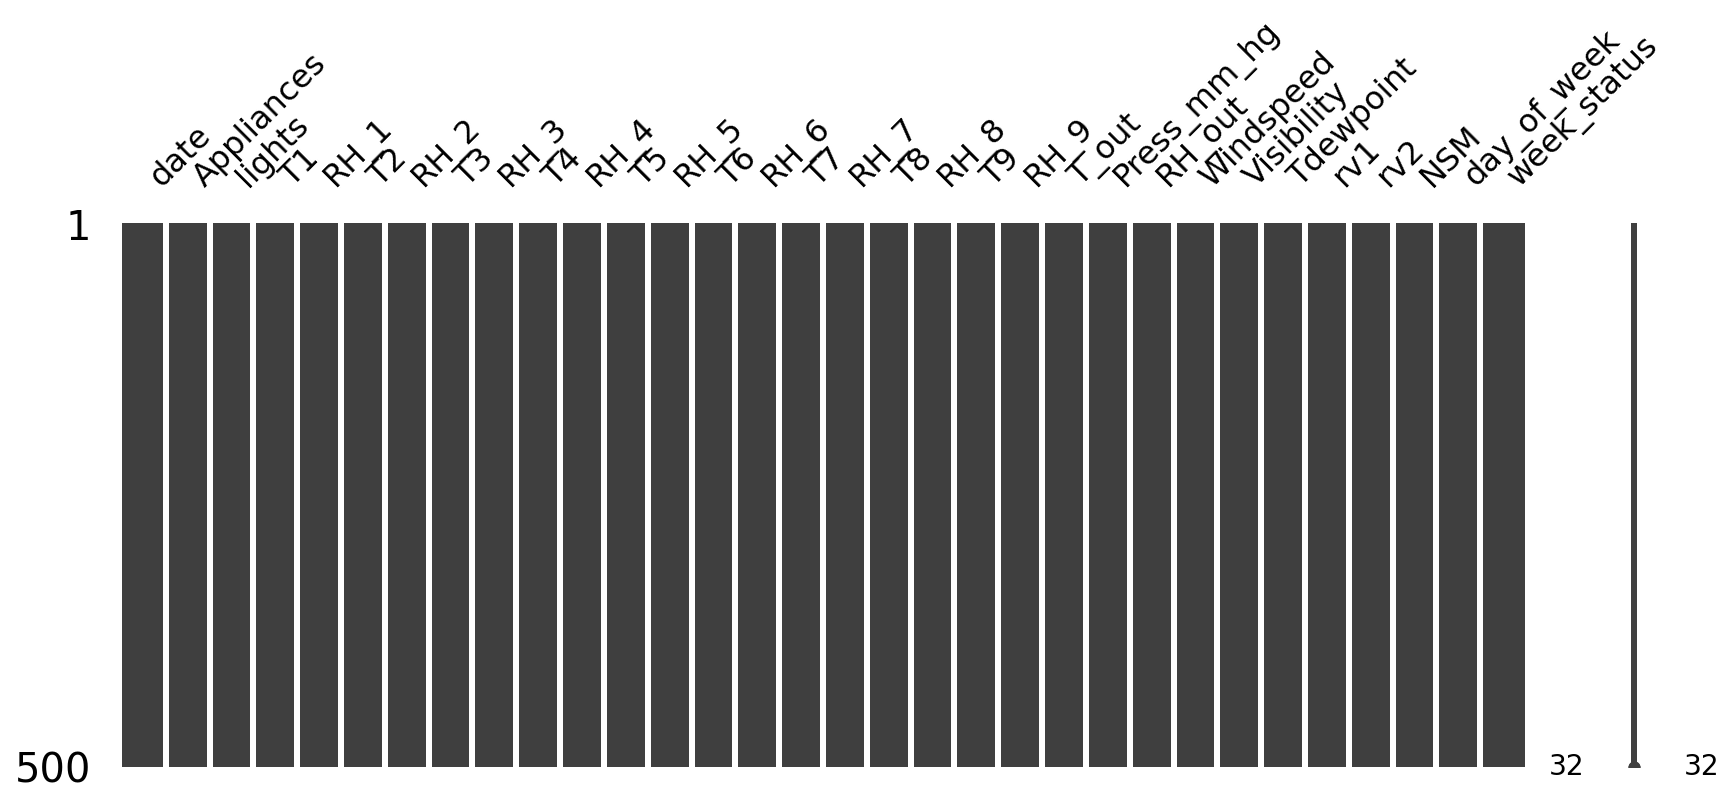

In [21]:
# Matrix of missingness of the data
msno.matrix(df.sample(500), figsize=(14, 5), width_ratios=(14, 1));

In [ ]:
## Data exploration

In [22]:

df[['Appliances', 'lights']].describe().astype(int)

Appliances  lights
count       19735   19735
mean           97       3
std           102       7
min            10       0
25%            50       0
50%            60       0
75%           100       0
max          1080      70

In [23]:
df[['Appliances', 'lights']].apply(scipy.stats.skew)
#Kurtosis is also zero for a normal distribution and can only be postiive.

Appliances    3.386110
lights        2.194988
dtype: float64

In [24]:
df[['Appliances', 'lights']].apply(scipy.stats.kurtosis)
#Kurtosis is also zero for a normal distribution and can only be postiive.

Appliances    13.664097
lights         4.460712
dtype: float64

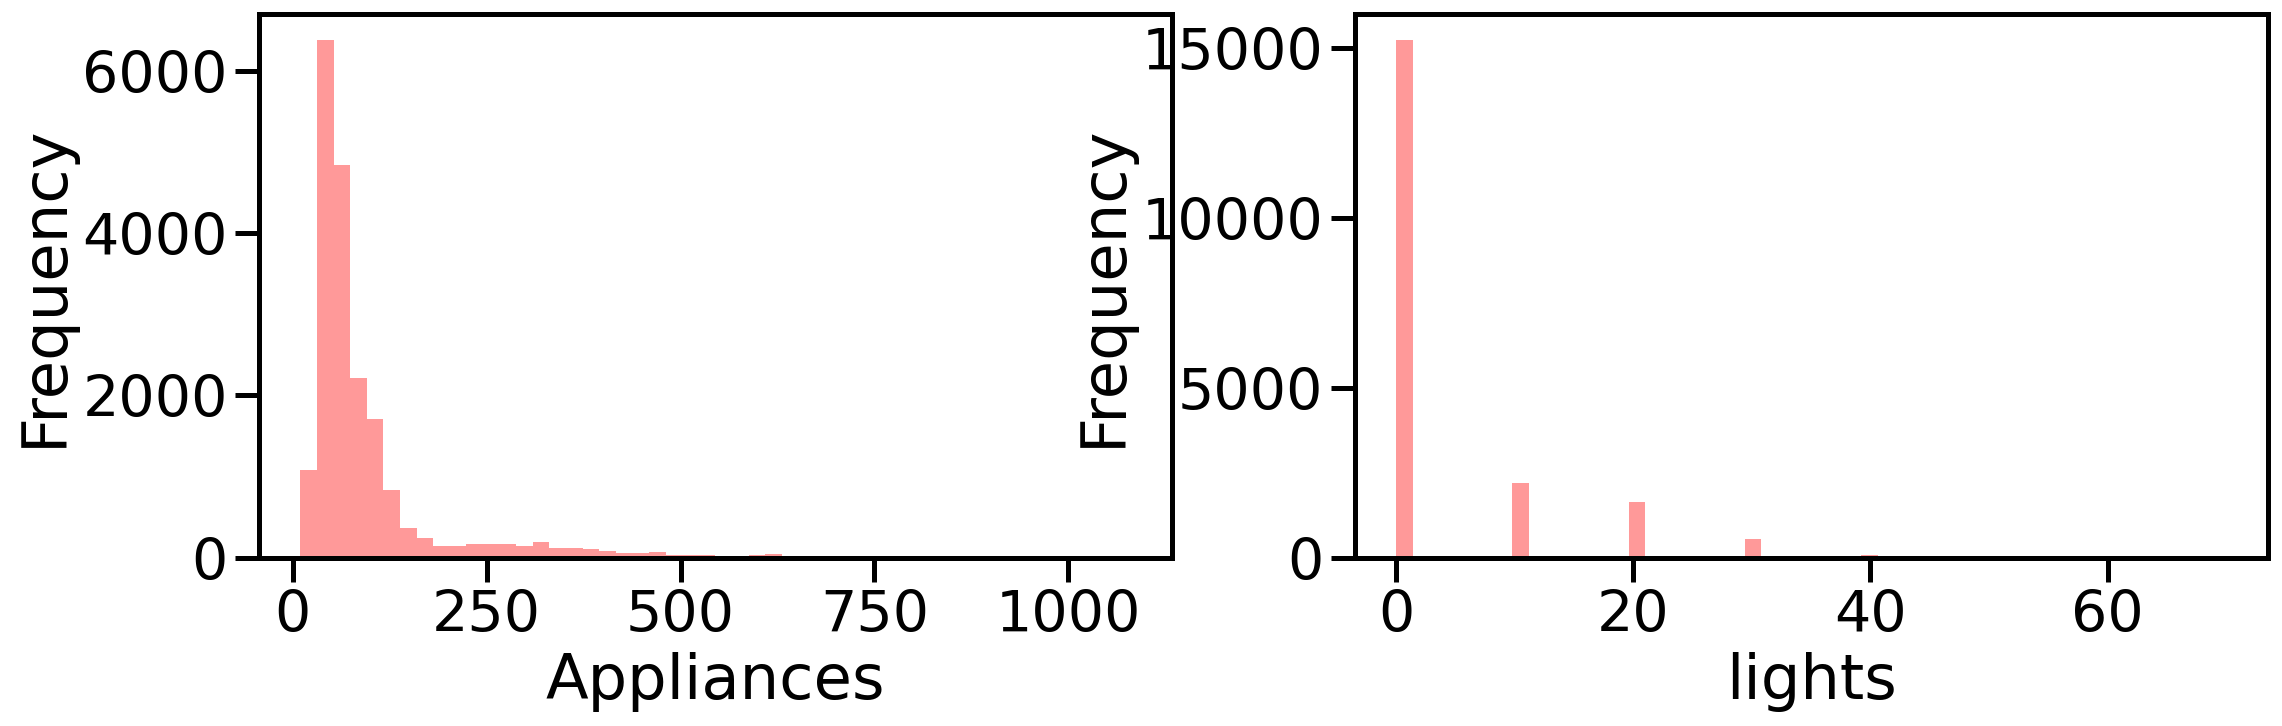

In [25]:
fig, (ax1, ax2) = plt.subplots(figsize=(18,5), ncols=2)
sns.distplot(df.Appliances, kde=False, color="red", ax=ax1)
sns.distplot(df.lights, kde=False, color="red", ax=ax2)
ax1.set_ylabel("Frequency")
ax2.set_ylabel("Frequency");

In [26]:
# Calculating Percentage of Zero Energy Consumption by Lights
total = df.lights.count()
non_zero_val = df.lights.astype(bool).sum(axis=0)
zero_val_percent = (total - non_zero_val)/total*100
print(zero_val_percent)

77.28401317456296


In [ ]:
#Appliances: Majority consumption is in the range of 0 ~ 200 kWh
#Lights: 77% of observations hace ZERO Lights Energy Consumption

In [27]:
df[['Appliances', 'lights']].apply(np.log).apply(scipy.stats.skew)
#It does reduce skewness but does not make it disappear. Also, for 'lights' most of the data is 0 and log is undefined.

Appliances    1.165728
lights             NaN
dtype: float64

In [28]:
df[['Appliances', 'lights']].apply(np.log).apply(scipy.stats.kurtosis)
#again, it reduces but does not get rid of kurtosis.

Appliances    1.550408
lights             NaN
dtype: float64

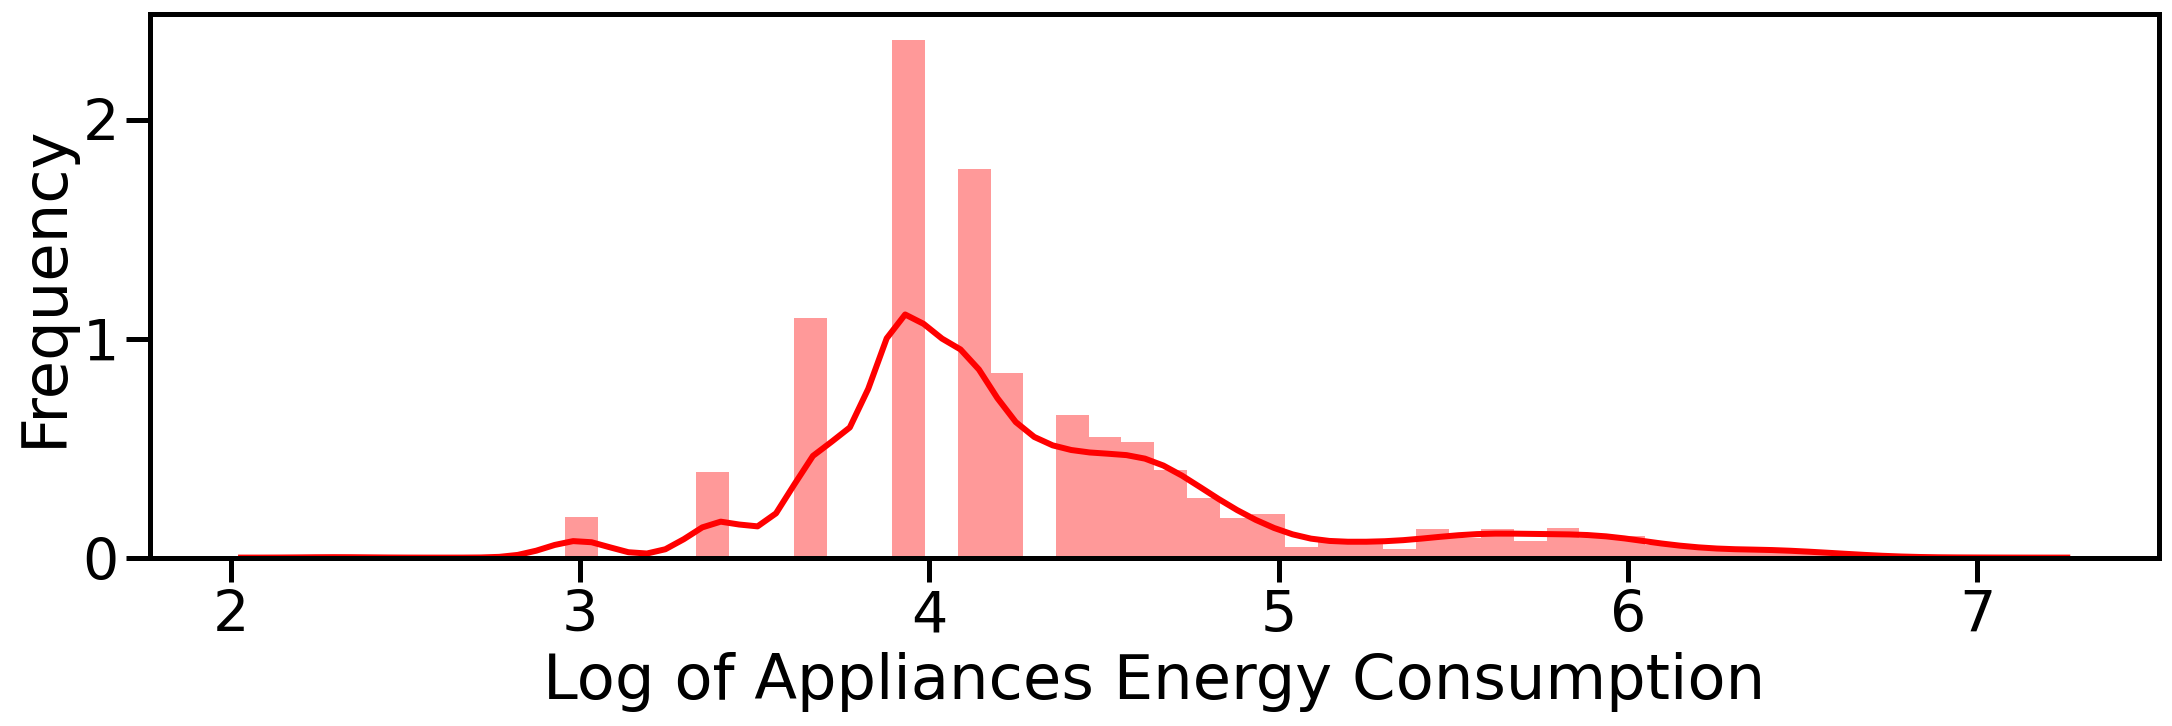

In [29]:
fig, ax1 = plt.subplots(figsize=(18,5))
sns.distplot(df.Appliances.apply(np.log), kde=True, color="red", ax=ax1)
ax1.set_ylabel("Frequency");
ax1.set_xlabel("Log of Appliances Energy Consumption");

In [30]:
df[['T6', 'T_out', 'RH_6', 'RH_out']].describe().astype(int)

T6  T_out   RH_6  RH_out
count  19735  19735  19735   19735
mean       7      7     54      79
std        6      5     31      14
min       -6     -5      1      24
25%        3      3     30      70
50%        7      6     55      83
75%       11     10     83      91
max       28     26     99     100

In [31]:
df[['T6', 'T_out', 'RH_6', 'RH_out']].apply(scipy.stats.skew)

T6        0.597426
T_out     0.534232
RH_6     -0.241943
RH_out   -0.922927
dtype: float64

In [32]:
df[['T6', 'T_out', 'RH_6', 'RH_out']].apply(scipy.stats.kurtosis)

T6        0.425137
T_out     0.363895
RH_6     -1.142079
RH_out    0.256490
dtype: float64

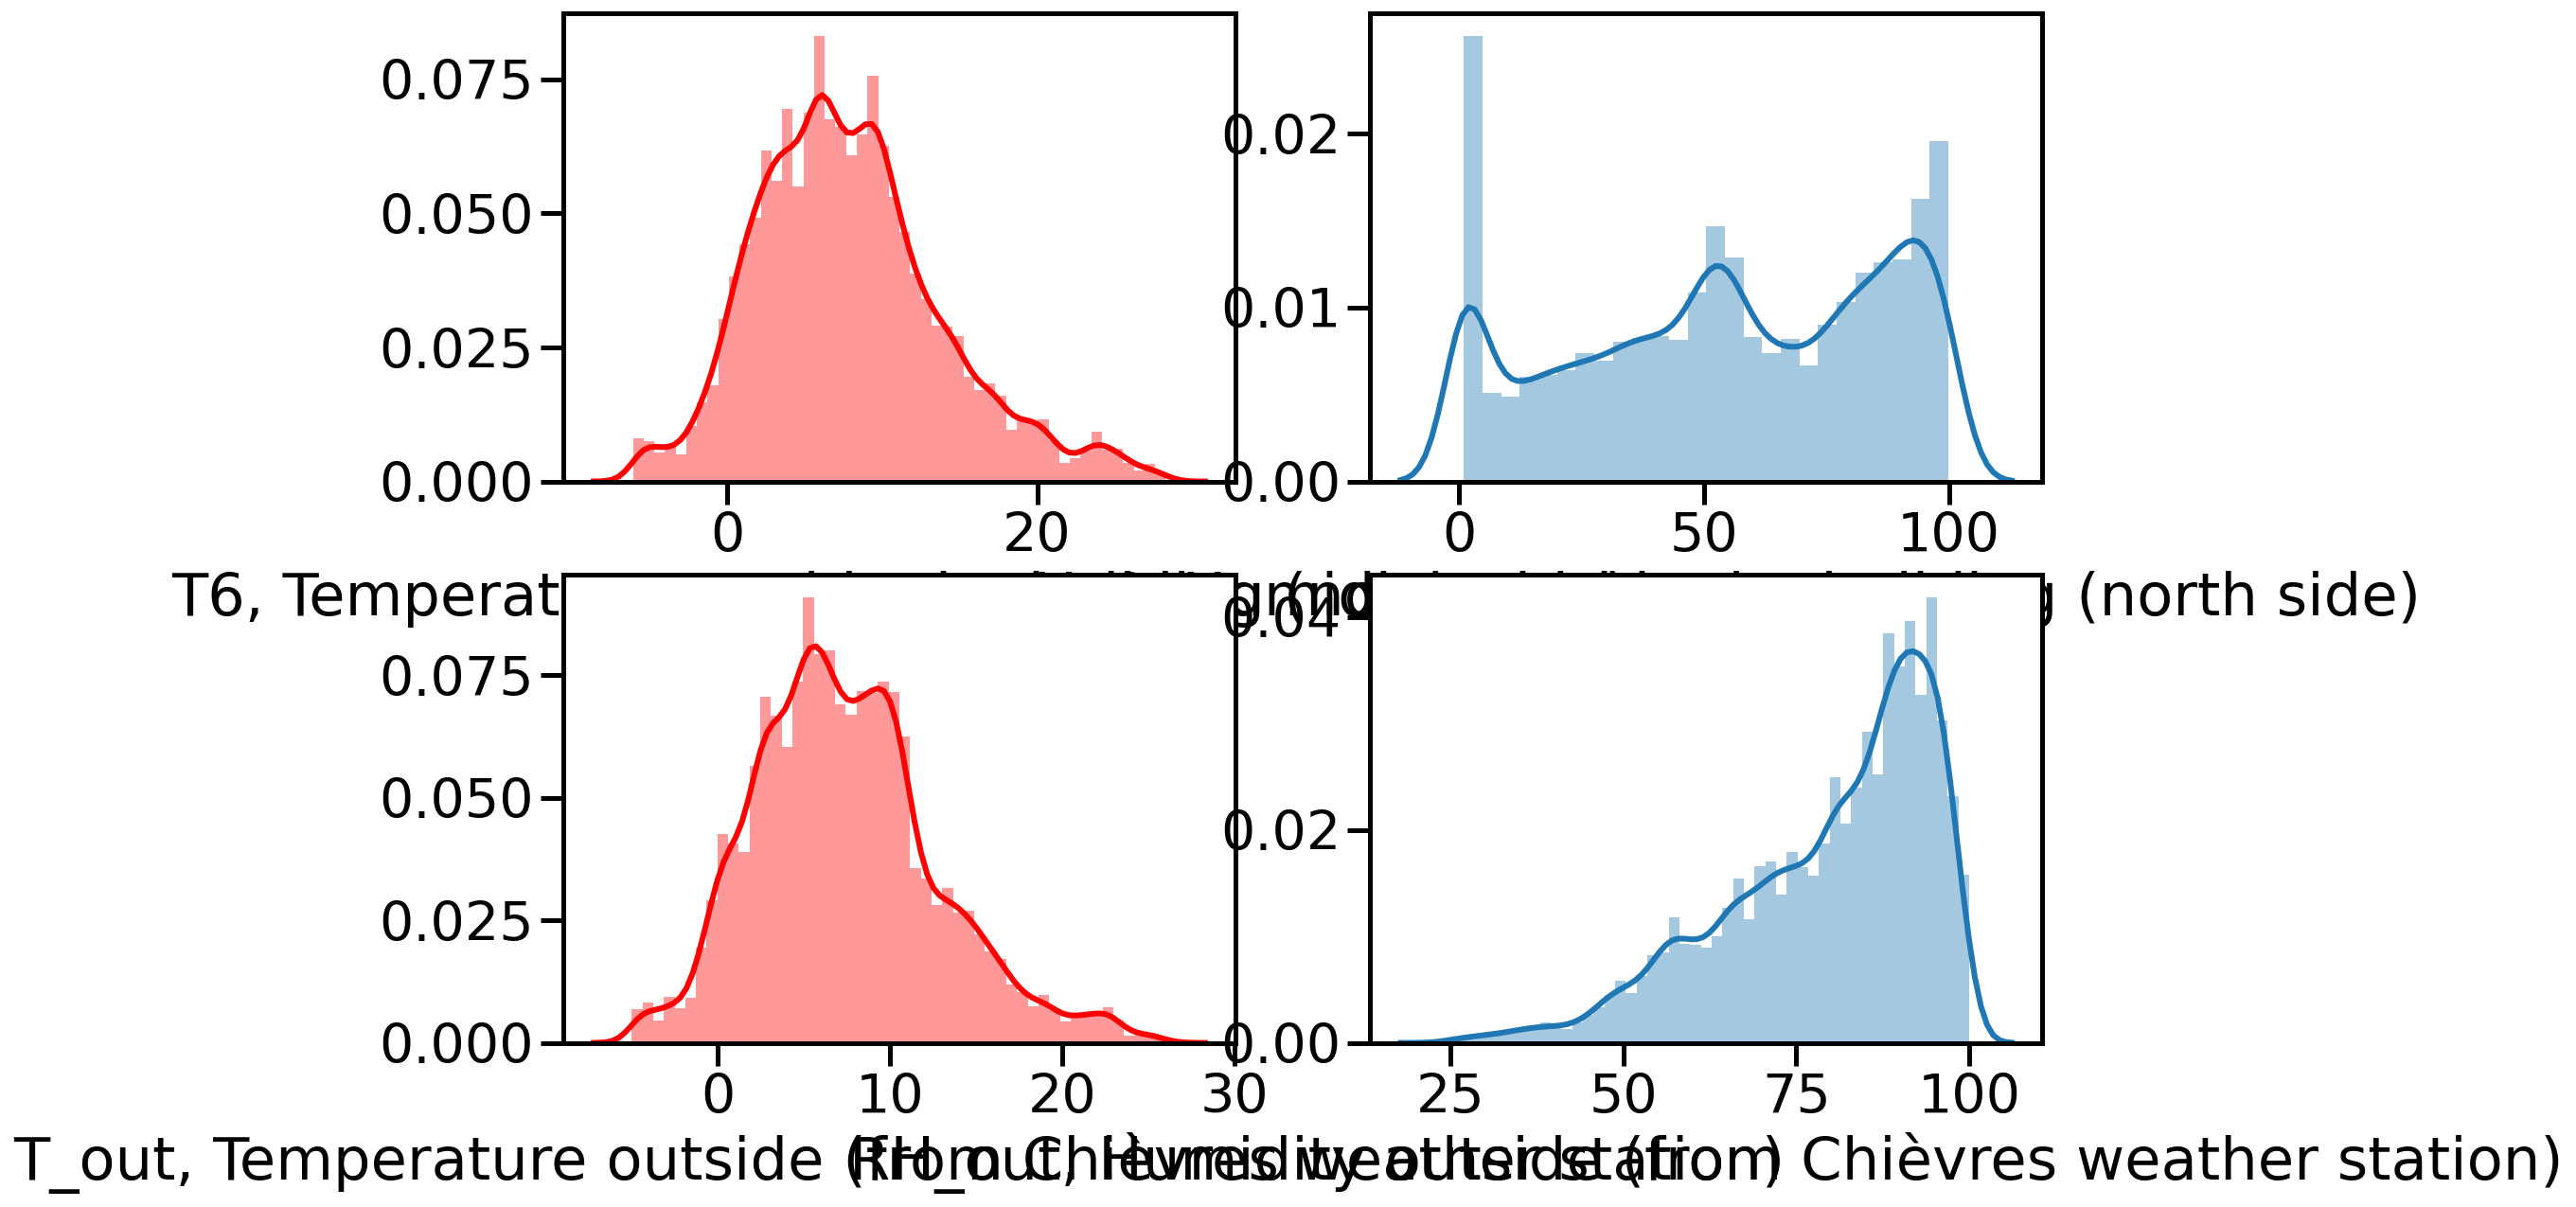

In [33]:
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(figsize=(14,10), nrows=2, ncols=2)
sns.distplot(df.T6, color="red", ax=ax1, axlabel="T6, Temperature outside the building (north side)")
sns.distplot(df.T_out, color="red", ax=ax2, axlabel="T_out, Temperature outside (from Chièvres weather station)")
sns.distplot(df.RH_6, ax=ax3, axlabel="RH_6, Humidity outside the building (north side)")
sns.distplot(df.RH_out, ax=ax4, axlabel="RH_out, Humidity outside (from Chièvres weather station)");

In [ ]:
#It can be roughly be concluded:

#While the temperatures are related, humidities vary significantly between Building Outside and Chièvres Weather Station
#Temparature peaks at 5°C and are normaly distributed

In [34]:
df[['T6', 'T_out', 'RH_6', 'RH_out']].apply(np.log).apply(scipy.stats.skew)

T6             NaN
T_out          NaN
RH_6     -1.862258
RH_out   -1.537867
dtype: float64

In [35]:
df[['T6', 'T_out', 'RH_6', 'RH_out']].apply(np.log).apply(scipy.stats.kurtosis)

T6             NaN
T_out          NaN
RH_6      2.529330
RH_out    2.815891
dtype: float64

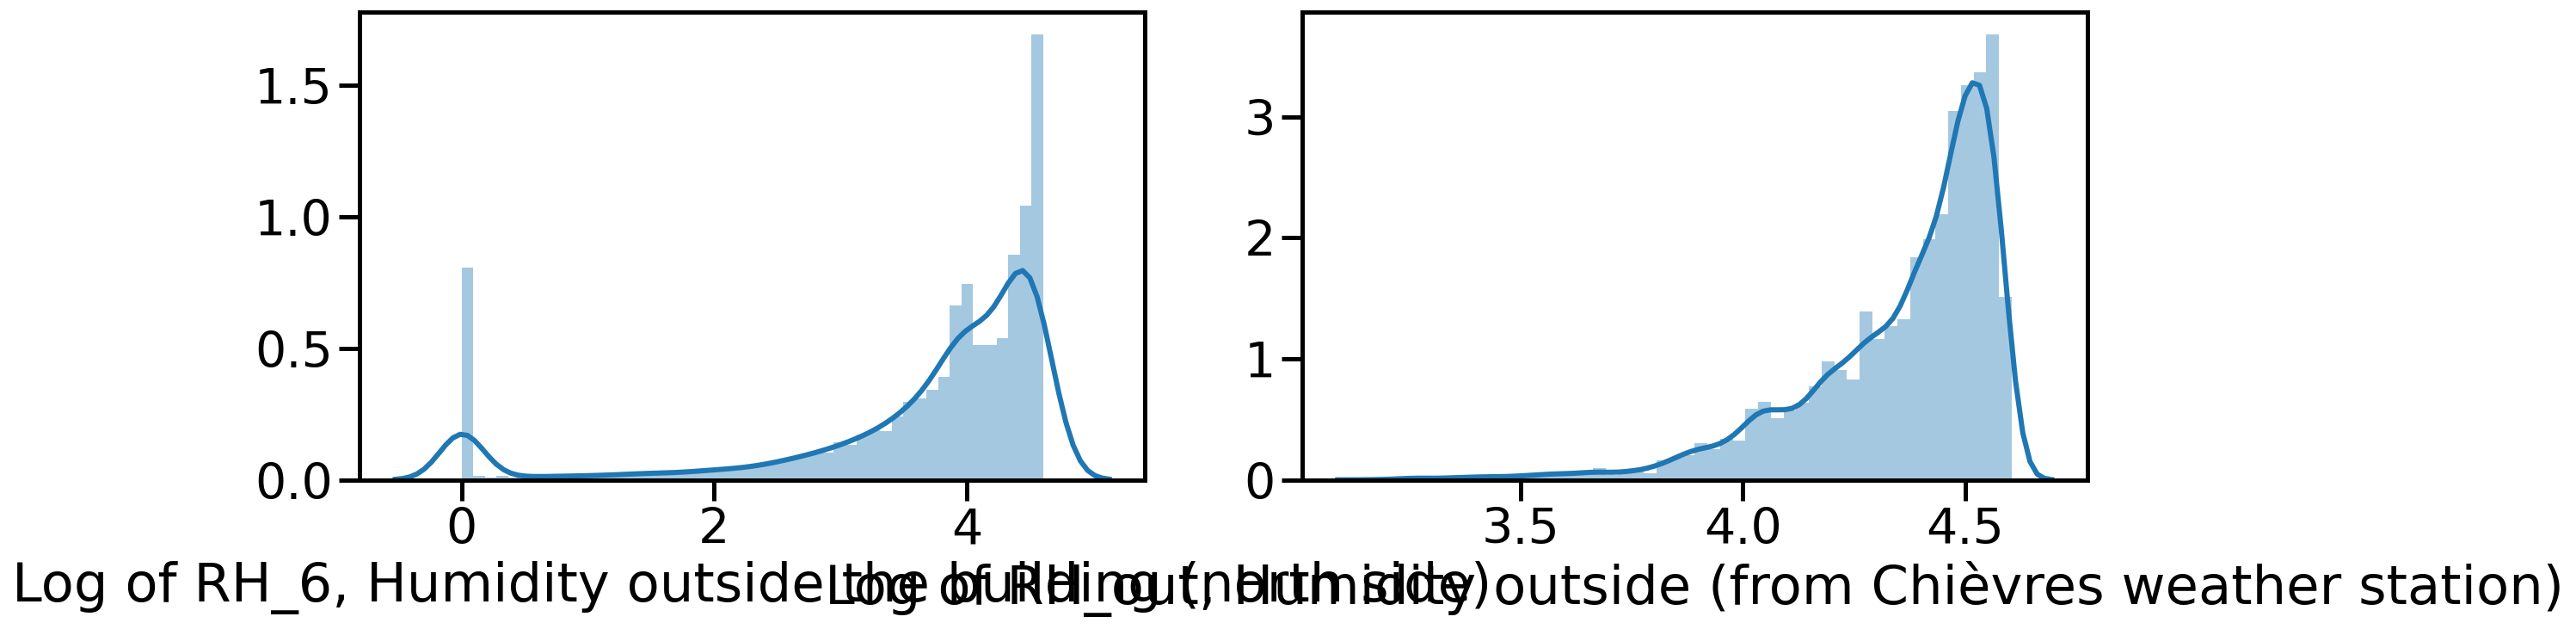

In [36]:
fig, ((ax3, ax4)) = plt.subplots(figsize=(18,5), ncols=2)
sns.distplot(df.RH_6.apply(np.log), ax=ax3, axlabel="Log of RH_6, Humidity outside the building (north side)")
sns.distplot(df.RH_out.apply(np.log), ax=ax4, axlabel="Log of RH_out, Humidity outside (from Chièvres weather station)");

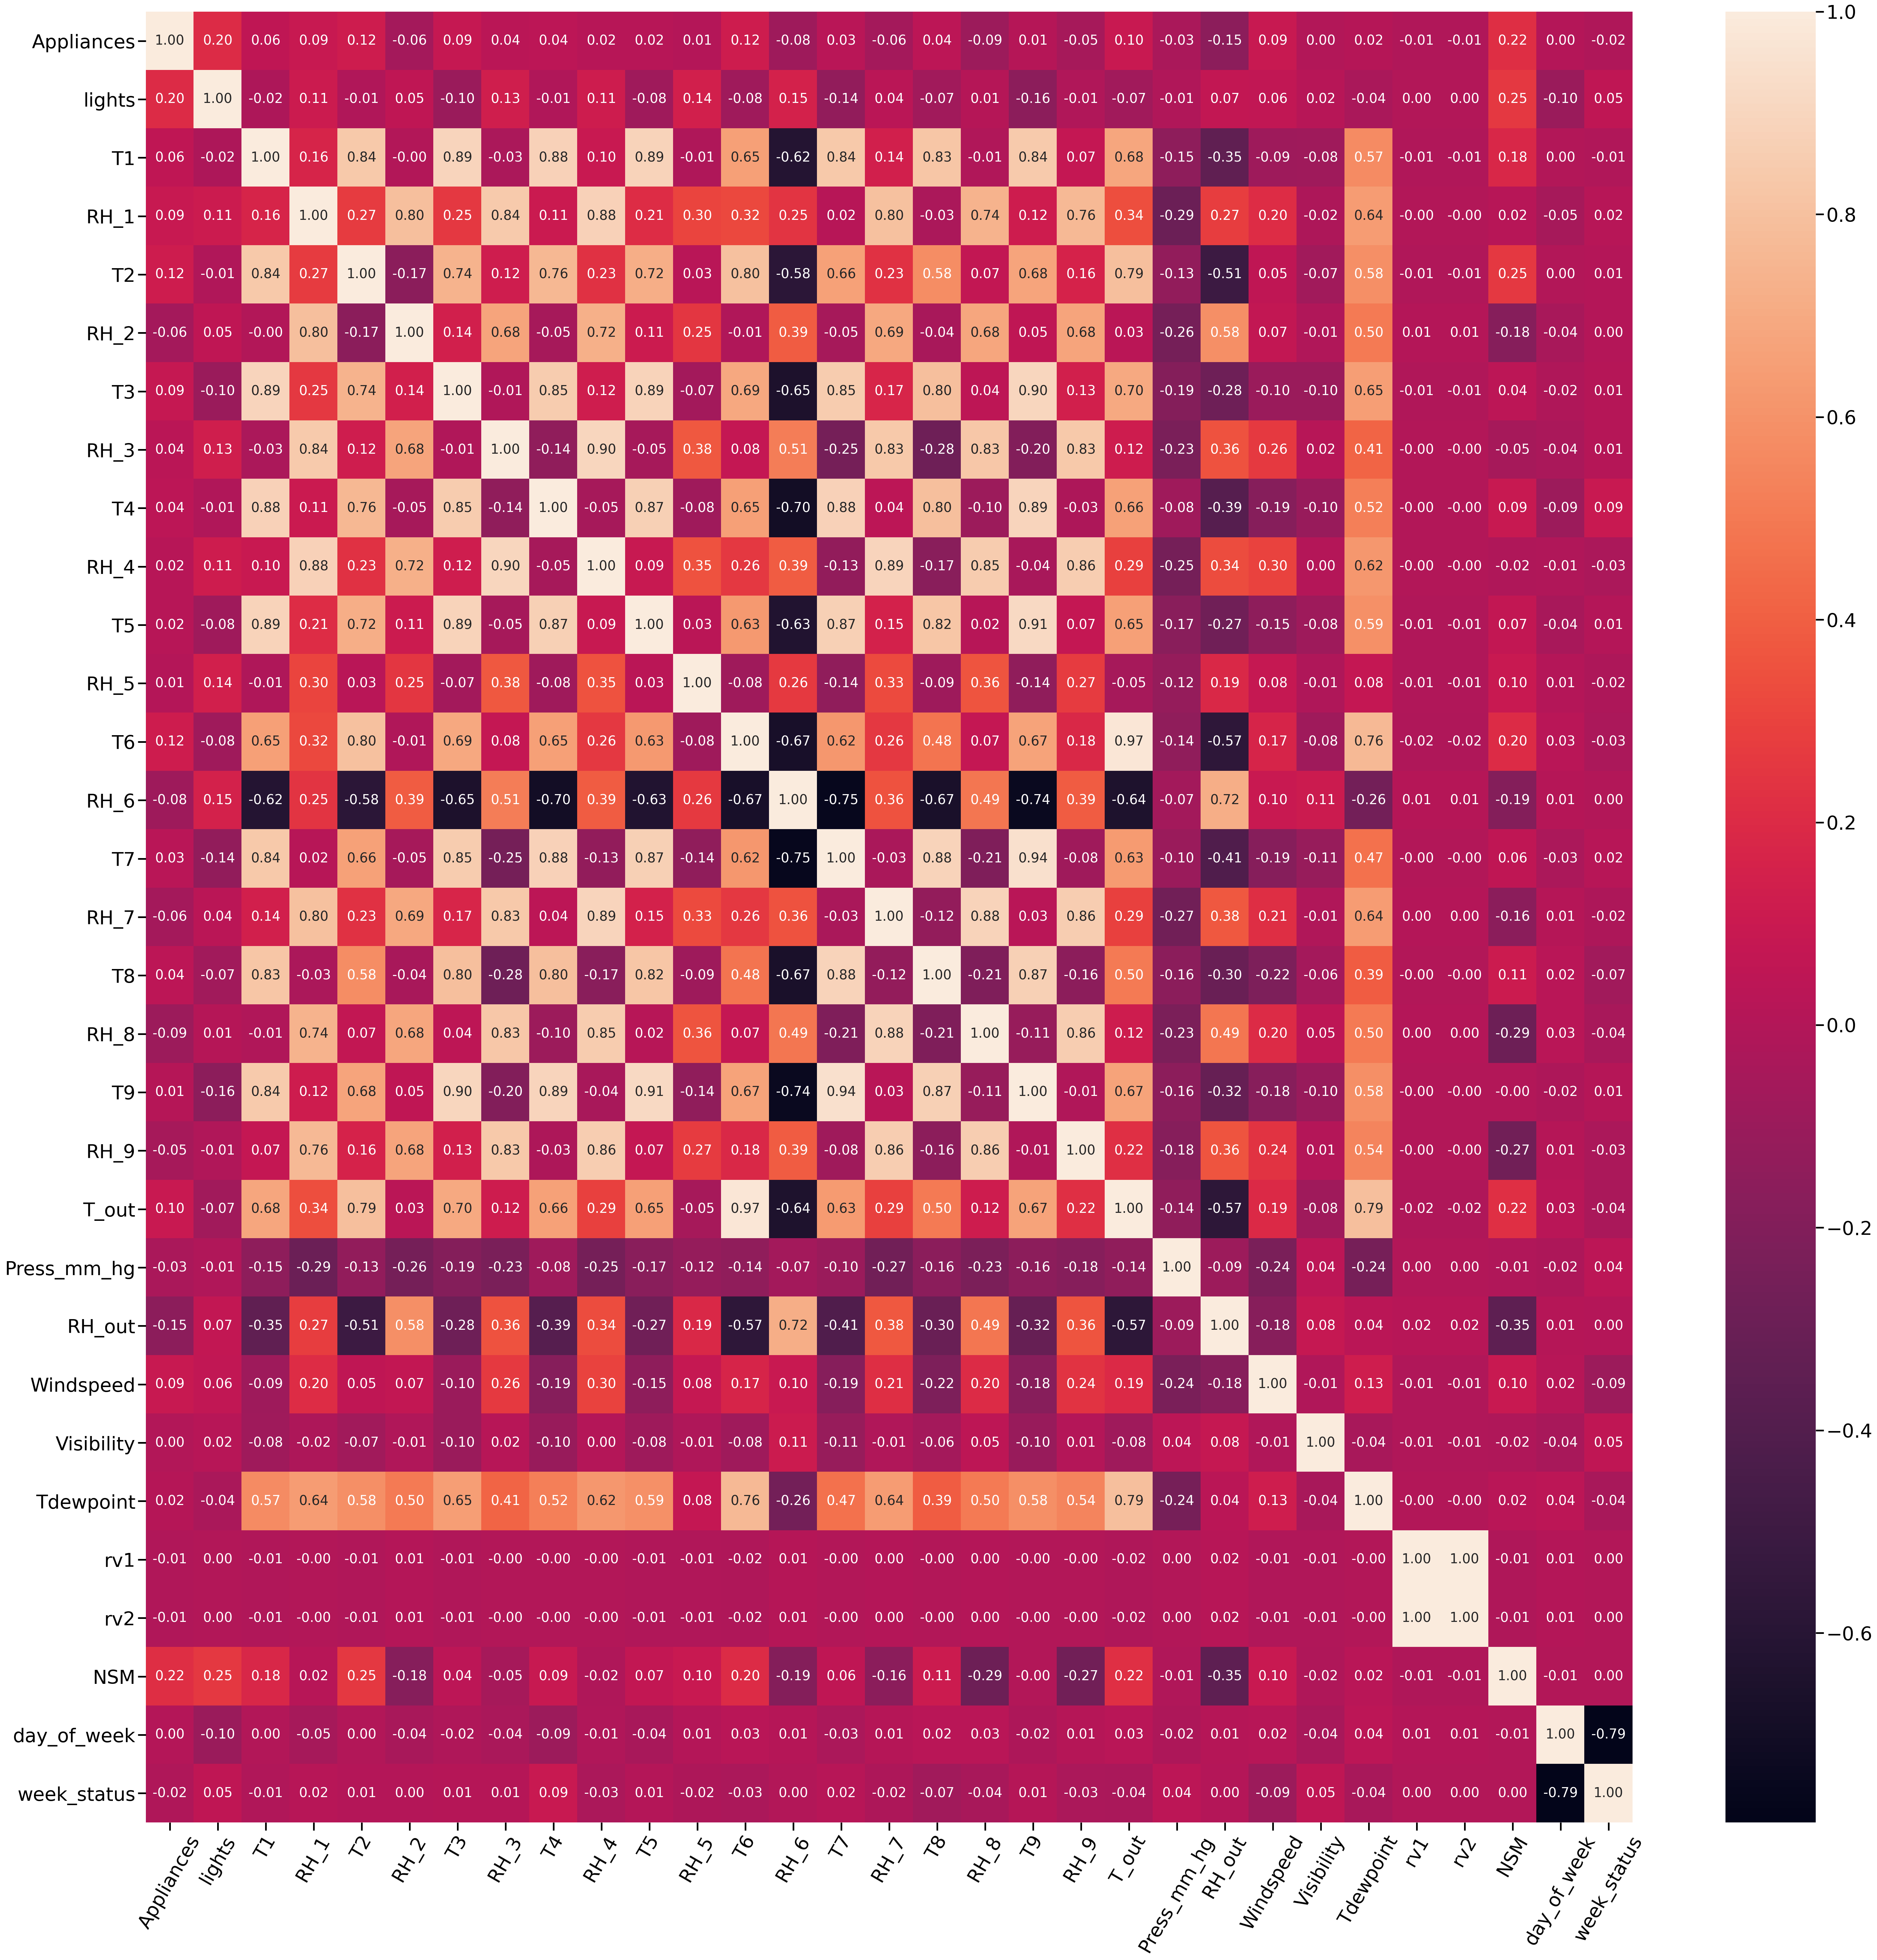

In [37]:
#Correlation Heat Map
plt.figure(figsize=(50,50));
a = sns.heatmap(df.corr(), annot=True, fmt=".2f", annot_kws={"size": 20});
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=60)
plt.show();

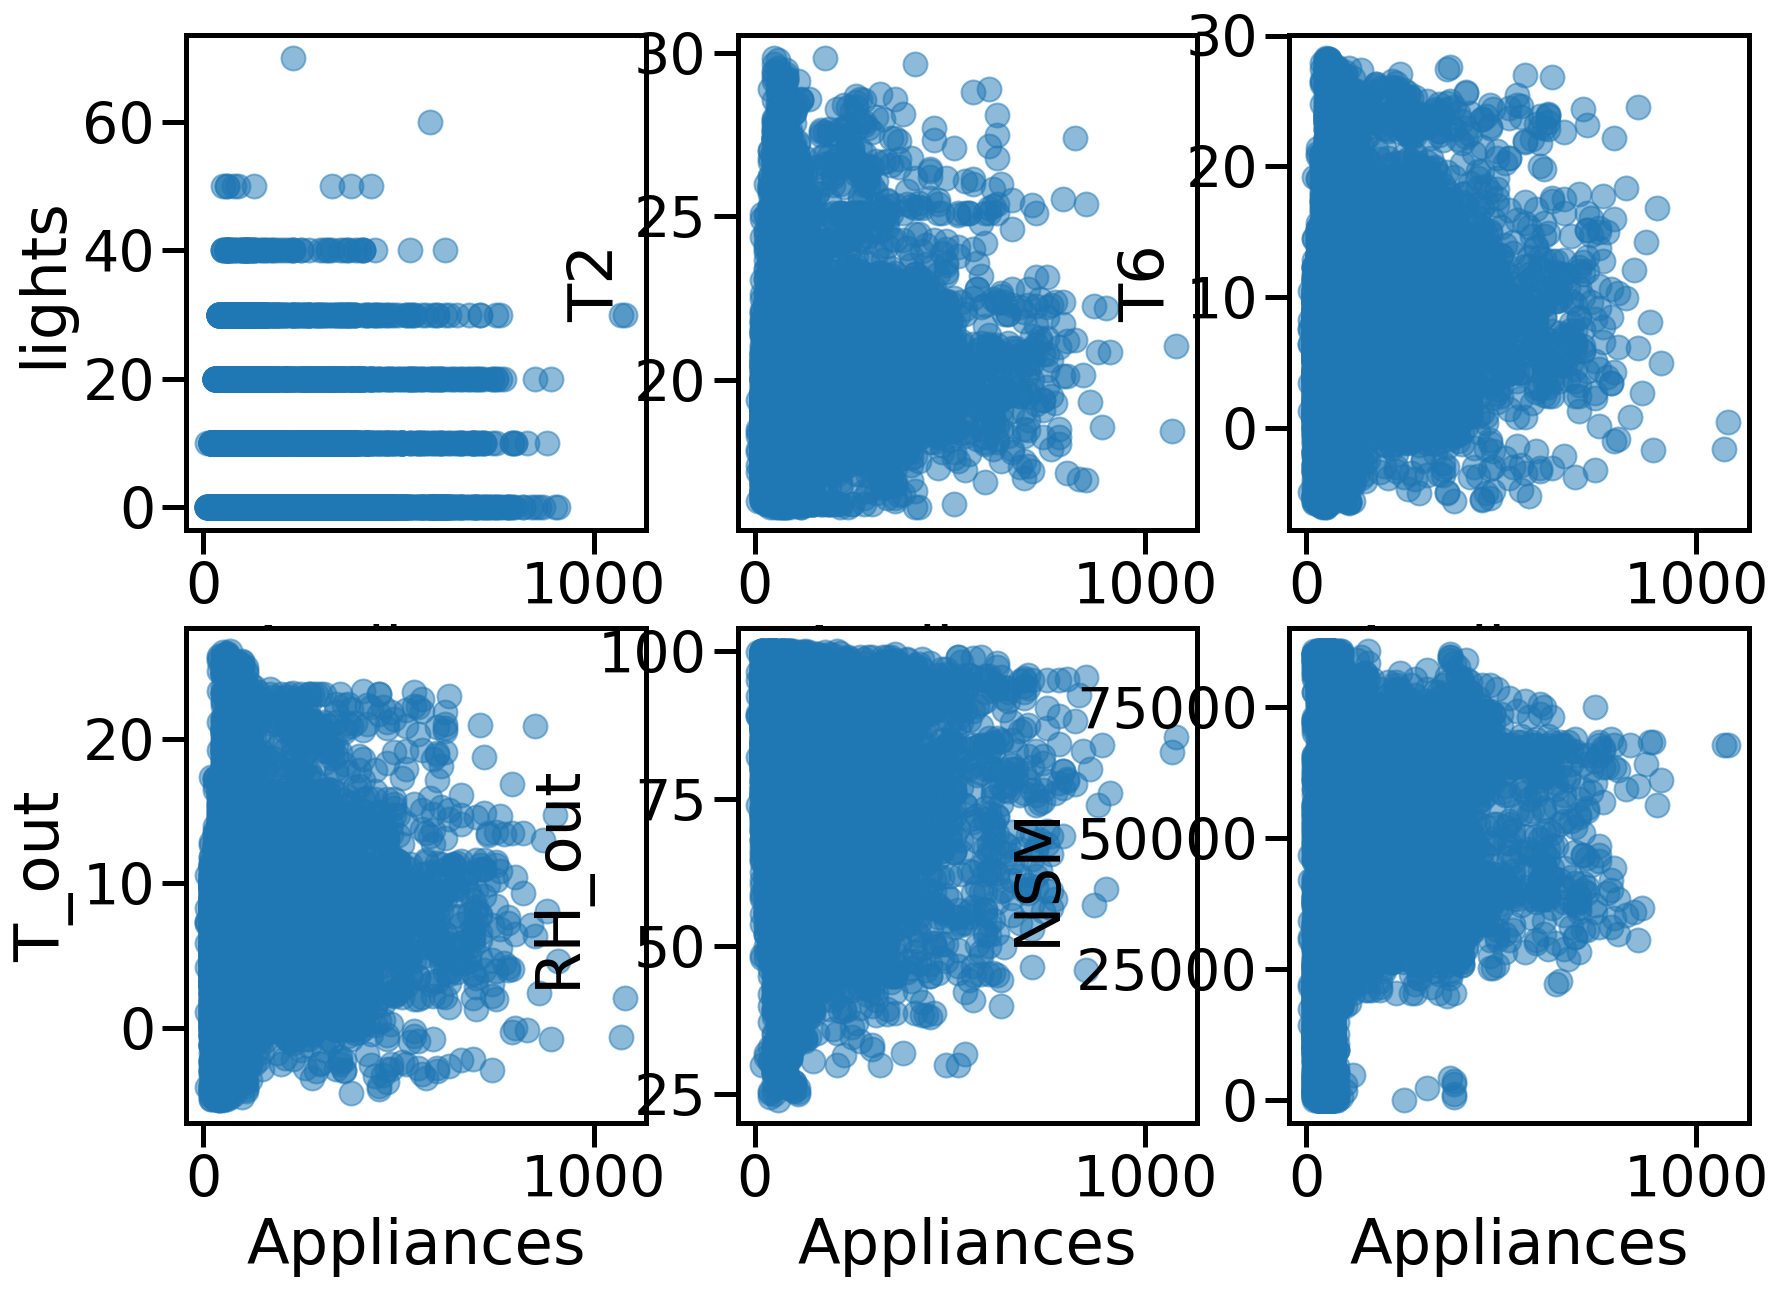

In [38]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(figsize=(14,10), nrows=2, ncols=3)
sns.regplot(x='Appliances', y='lights', data=df, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax1)
sns.regplot(x='Appliances', y='T2', data=df, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax2)
sns.regplot(x='Appliances', y='T6', data=df, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax3)
sns.regplot(x='Appliances', y='T_out', data=df, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax4)
sns.regplot(x='Appliances', y='RH_out', data=df, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax5)
sns.regplot(x='Appliances', y='NSM', data=df, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax6);

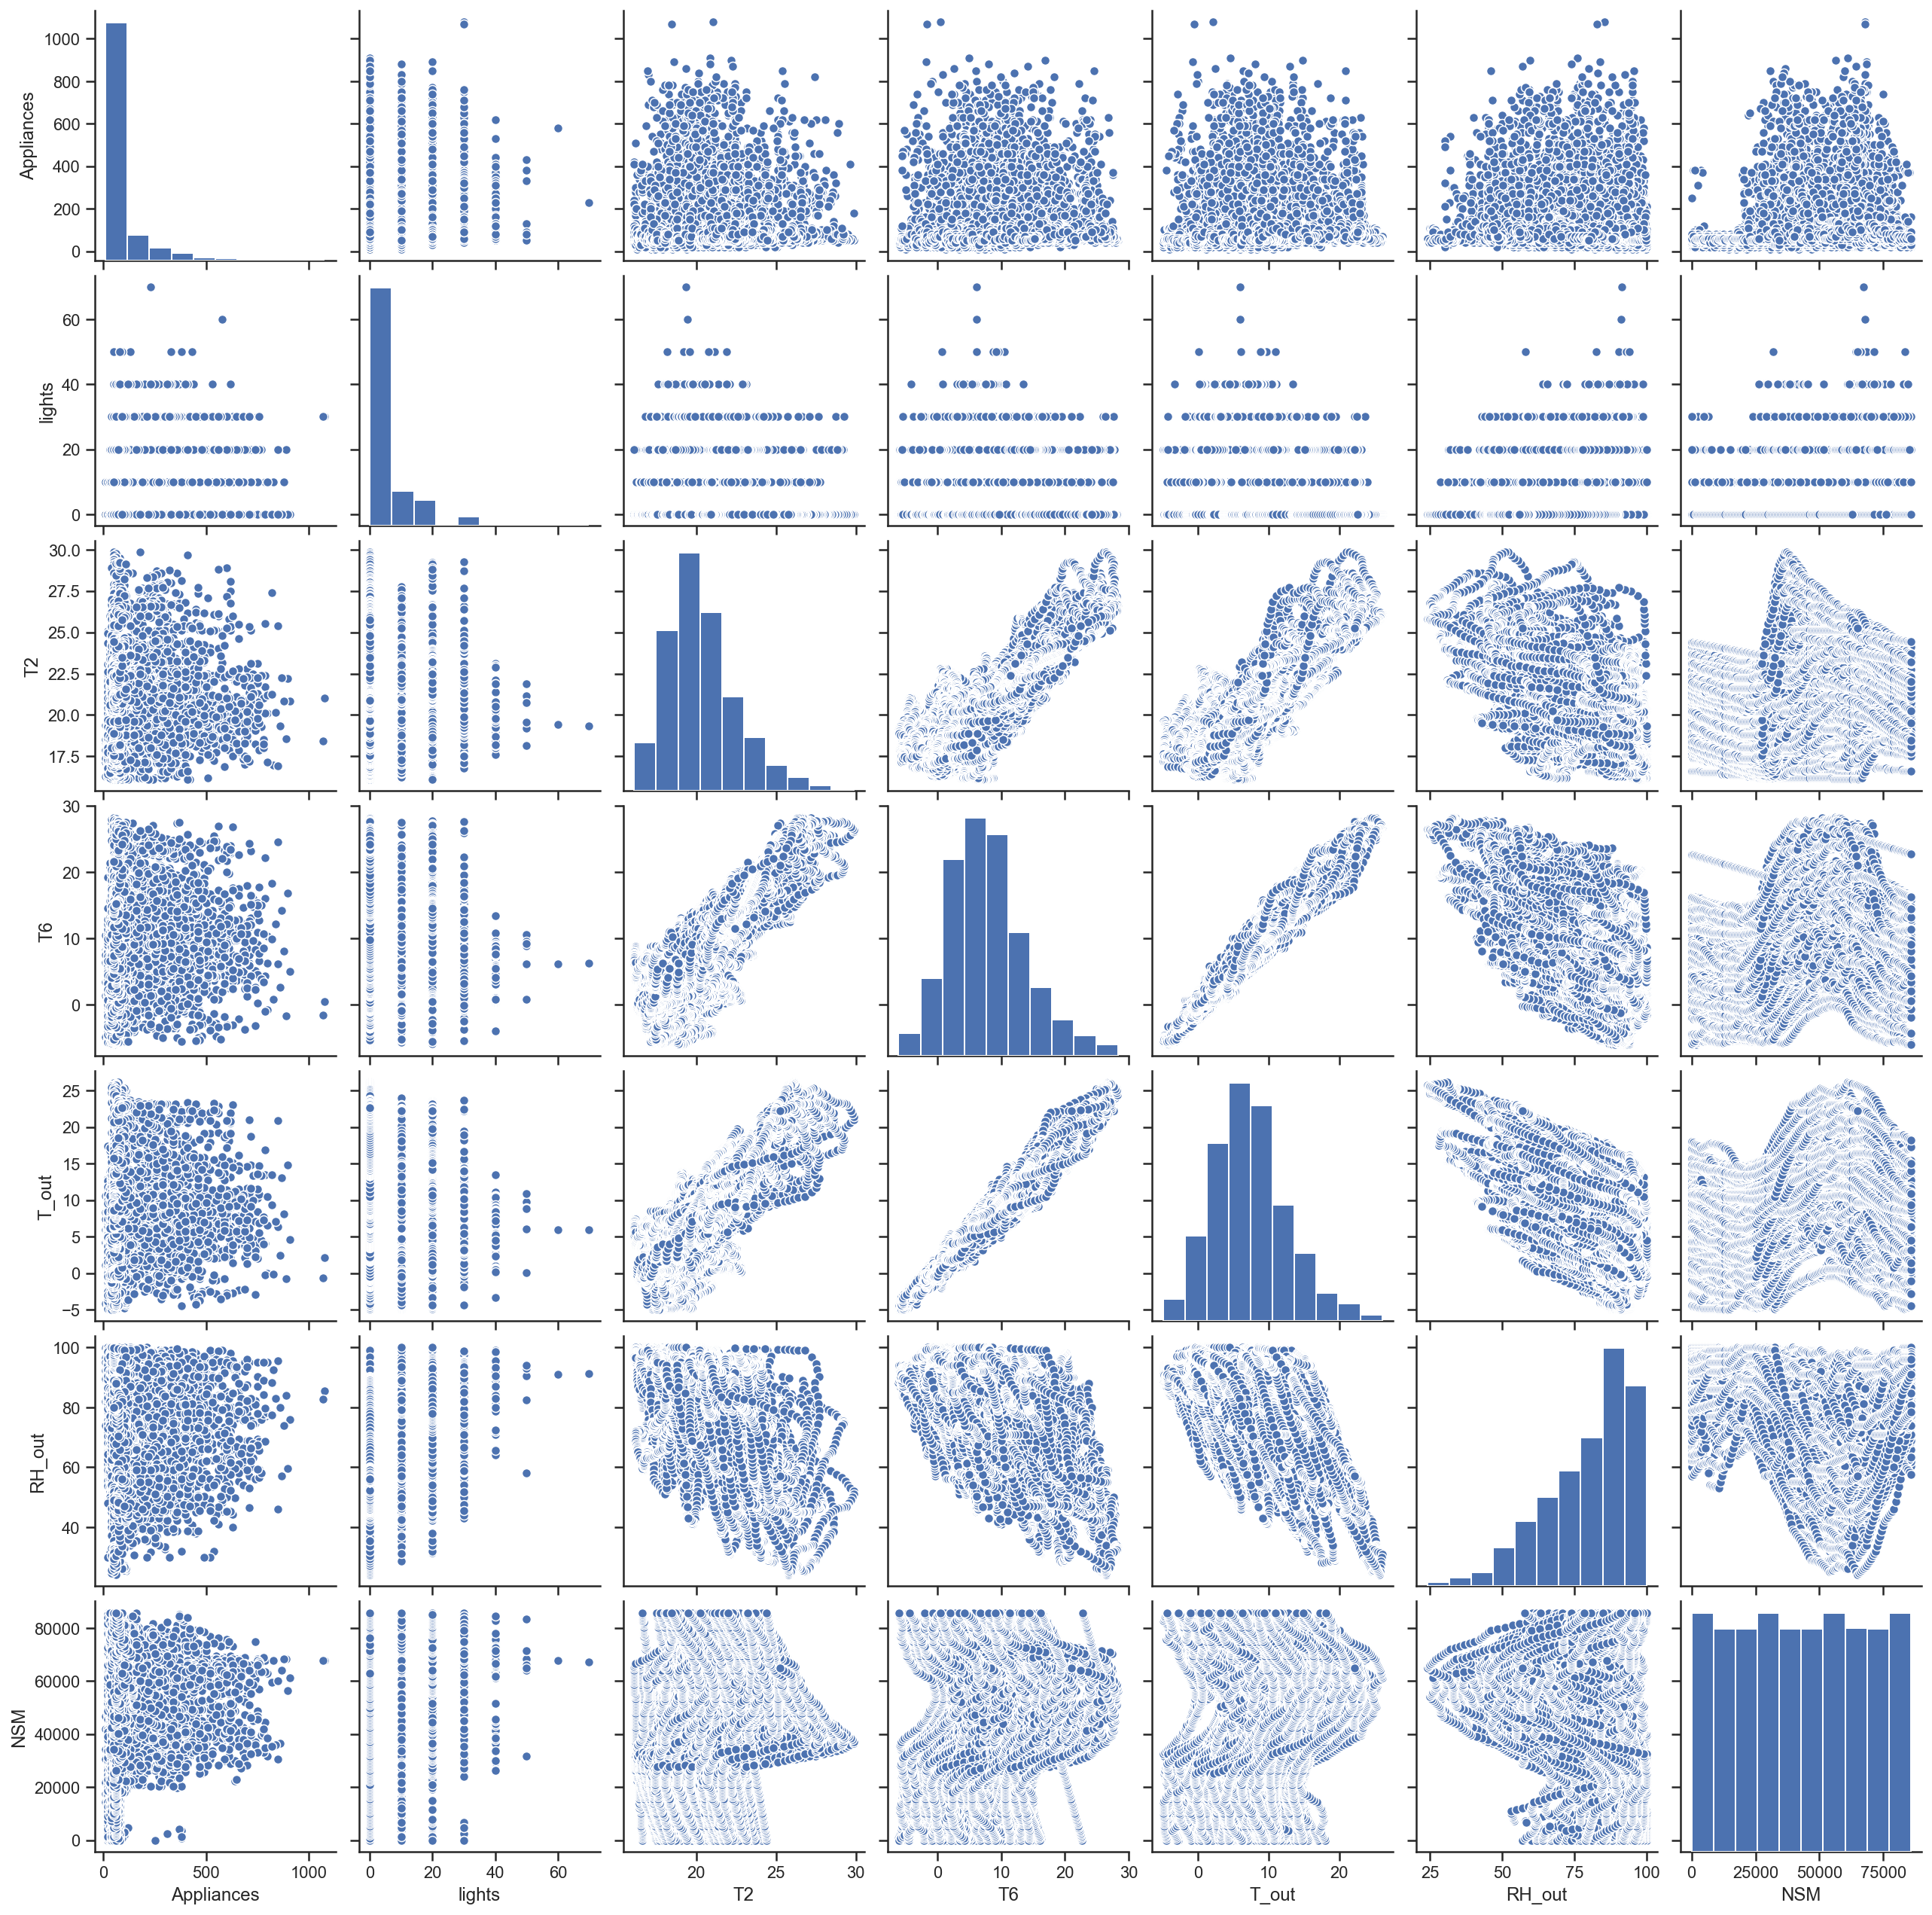

In [39]:
sns.set(style="ticks", color_codes=True);
sns.pairplot(df[['Appliances', 'lights', 'T2', 'T6', 'T_out', 'RH_out', 'NSM']]);

In [ ]:

There are few very obvious outliers in these relationships. A quick check through the correlations:

Are there zeros?
Yes, zero is a possible observation for all the attributes except 'lights' which 77% of its data as zeros
Are there strange correlations?
Yes, the correlation is too scattered to figure out any pattern
NSM shows that appliances are usually used from morning 5:30am (20,000 sec past midnight) everyday
RH_out shows a rough interpretation that consumption increases with respect to the increase in humidity
Are there separate clusters (possible data recording error or anomaly)?
No, but there are many outliers
There are many non-linear relationships. One way to address this is to bin variables into categories and look at the distribution of other variables for each category.


In [40]:
consumption_bins = ['Very Low', 'Low', 'Medium', 'High', 'Very high']
df['Appliances_bin'] = pd.qcut(df.Appliances, 5, consumption_bins)
bin_ranges = pd.qcut(df.Appliances, 5).unique()
bin_ranges

[(50.0, 60.0], (9.999, 50.0], (60.0, 70.0], (110.0, 1080.0], (70.0, 110.0]]
Categories (5, interval[float64]): [(9.999, 50.0] < (50.0, 60.0] < (60.0, 70.0] < (70.0, 110.0] < (110.0, 1080.0]]

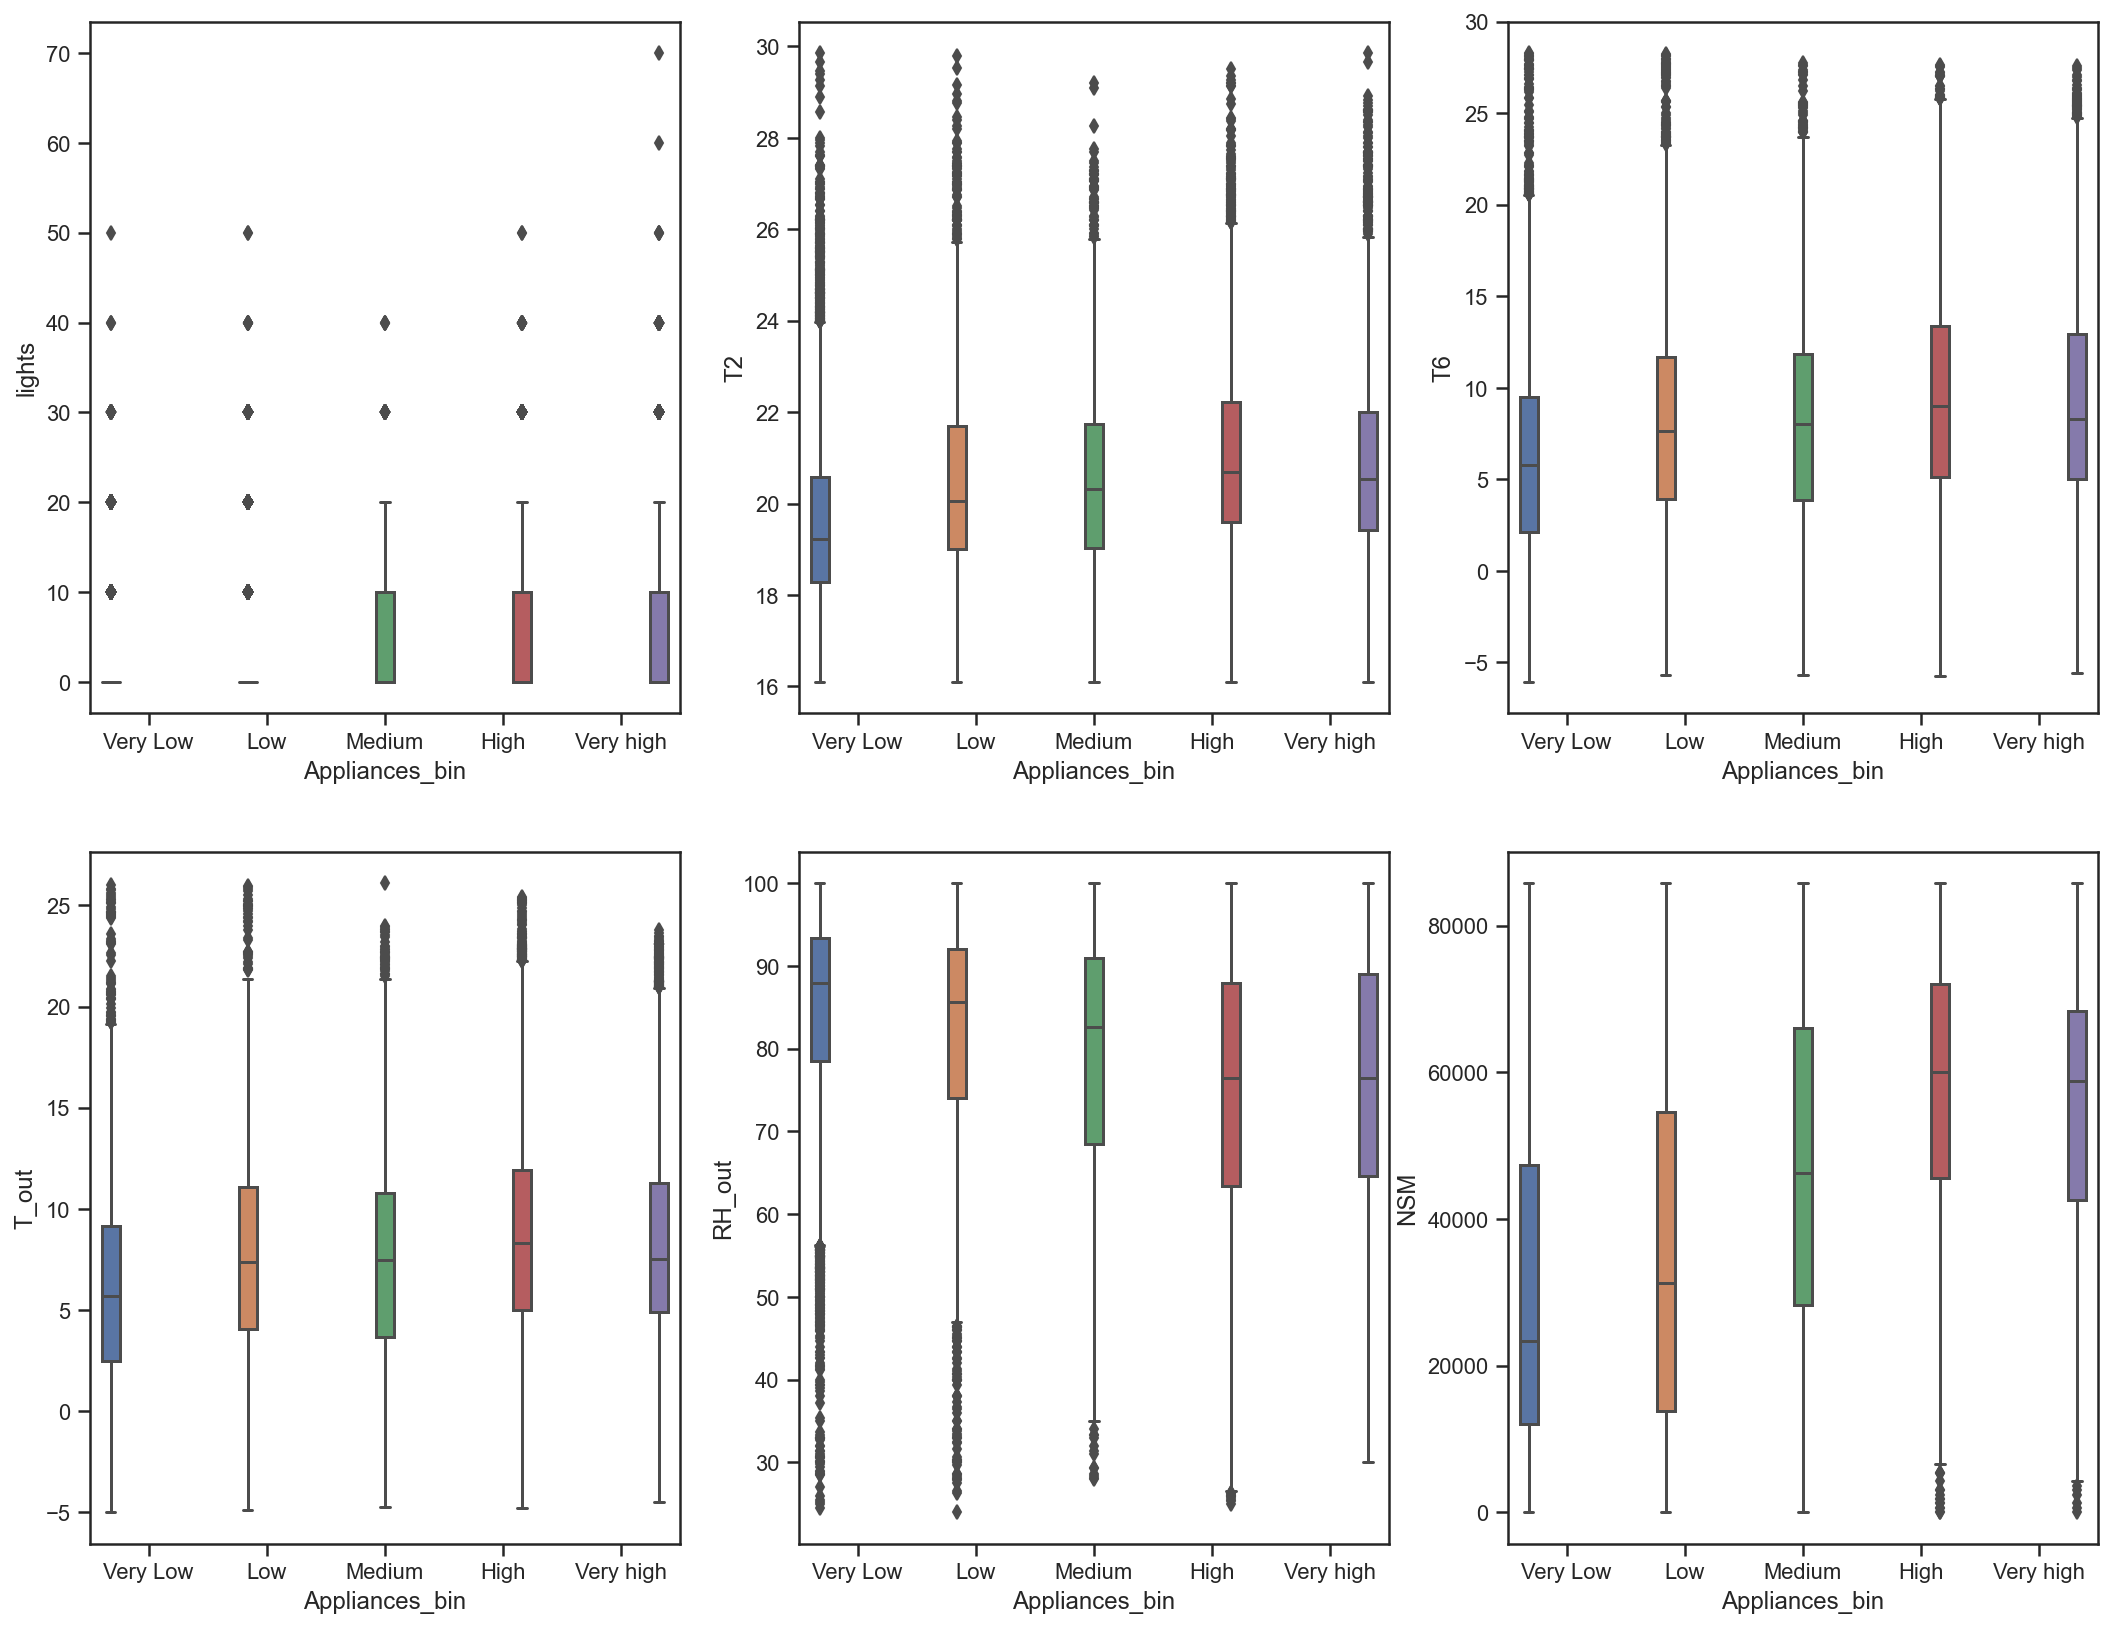

In [41]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(figsize=(18,14), nrows=2, ncols=3)
sns.boxplot(x='Appliances_bin', y='lights', hue='Appliances_bin', data=df, ax = ax1)
sns.boxplot(x='Appliances_bin', y='T2', hue='Appliances_bin', data=df, ax = ax2)
sns.boxplot(x='Appliances_bin', y='T6', hue='Appliances_bin', data=df, ax = ax3)
sns.boxplot(x='Appliances_bin', y='T_out', hue='Appliances_bin', data=df, ax = ax4)
sns.boxplot(x='Appliances_bin', y='RH_out', hue='Appliances_bin', data=df, ax = ax5)
sns.boxplot(x='Appliances_bin', y='NSM', hue='Appliances_bin', data=df, ax = ax6)
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)
ax4.legend().set_visible(False)
ax5.legend().set_visible(False)
ax6.legend().set_visible(False);

In [42]:
df = df.drop(['Appliances_bin'],axis=1)

In [43]:
df_describe = df.describe().T

In [44]:
df_describe['Interquartile Range'] = 1.5*(df_describe['75%'] - df_describe['25%'])

In [45]:
df_describe['Major Outlier'] = (df_describe['75%'] + df_describe['Interquartile Range'])
df_describe['Minor Outlier'] = (df_describe['25%'] - df_describe['Interquartile Range'])

In [46]:
df_describe

count          mean           std         min           25%  \
Appliances   19735.0     97.694958    102.524891   10.000000     50.000000   
lights       19735.0      3.801875      7.935988    0.000000      0.000000   
T1           19735.0     21.686571      1.606066   16.790000     20.760000   
RH_1         19735.0     40.259739      3.979299   27.023333     37.333333   
T2           19735.0     20.341219      2.192974   16.100000     18.790000   
RH_2         19735.0     40.420420      4.069813   20.463333     37.900000   
T3           19735.0     22.267611      2.006111   17.200000     20.790000   
RH_3         19735.0     39.242500      3.254576   28.766667     36.900000   
T4           19735.0     20.855335      2.042884   15.100000     19.530000   
RH_4         19735.0     39.026904      4.341321   27.660000     35.530000   
T5           19735.0     19.592106      1.844623   15.330000     18.277500   
RH_5         19735.0     50.949283      9.022034   29.815000     45.400000   
T6           19735.0      7.910939      6.090347   -6.065000      3.626667   
RH_6         19735.0     54.609083     31.149806    1.000000     30.025000   
T7           19735.0     20.267106      2.109993   15.390000     18.700000   
RH_7         19735.0     35.388200      5.114208   23.200000     31.500000   
T8           19735.0     22.029107      1.956162   16.306667     20.790000   
RH_8         19735.0     42.936165      5.224361   29.600000     39.066667   
T9           19735.0     19.485828      2.014712   14.890000     18.000000   
RH_9         19735.0     41.552401      4.151497   29.166667     38.500000   
T_out        19735.0      7.411665      5.317409   -5.000000      3.666667   
Press_mm_hg  19735.0    755.522602      7.399441  729.300000    750.933333   
RH_out       19735.0     79.750418     14.901088   24.000000     70.333333   
Windspeed    19735.0      4.039752      2.451221    0.000000      2.000000   
Visibility   19735.0     38.330834     11.794719    1.000000     29.000000   
Tdewpoint    19735.0      3.760707      4.194648   -6.600000      0.900000   
rv1          19735.0     24.988033     14.496634    0.005322     12.497889   
rv2          19735.0     24.988033     14.496634    0.005322     12.497889   
NSM          19735.0  42907.129465  24940.020831    0.000000  21600.000000   
day_of_week  19735.0      2.977249      1.985617    0.000000      1.000000   
week_status  19735.0      0.722726      0.447664    0.000000      0.000000   

                      50%           75%           max  Interquartile Range  \
Appliances      60.000000    100.000000   1080.000000            75.000000   
lights           0.000000      0.000000     70.000000             0.000000   
T1              21.600000     22.600000     26.260000             2.760000   
RH_1            39.656667     43.066667     63.360000             8.600000   
T2              20.000000     21.500000     29.856667             4.065000   
RH_2            40.500000     43.260000     56.026667             8.040000   
T3              22.100000     23.290000     29.236000             3.750000   
RH_3            38.530000     41.760000     50.163333             7.290000   
T4              20.666667     22.100000     26.200000             3.855000   
RH_4            38.400000     42.156667     51.090000             9.940000   
T5              19.390000     20.619643     25.795000             3.513214   
RH_5            49.090000     53.663333     96.321667            12.395000   
T6               7.300000     11.256000     28.290000            11.444000   
RH_6            55.290000     83.226667     99.900000            79.802500   
T7              20.033333     21.600000     26.000000             4.350000   
RH_7            34.863333     39.000000     51.400000            11.250000   
T8              22.100000     23.390000     27.230000             3.900000   
RH_8            42.375000     46.536000     58.780000            11.204000   
T9              19.390000     20.600

In [47]:
def remove_outlier(df, variable):
    major_o = df_describe.loc[variable,'Major Outlier']
    minor_o = df_describe.loc[variable,'Minor Outlier']
    df = df.drop(df[(df[variable]>major_o) | (df[variable]<minor_o)].index)
    return df

In [48]:
outlier_column_list = [x for x in all_columns 
                       if x not in ('date', 'Appliances', 'lights', 'RH_6', 'RH_out', 'Windspeed', 'Visibility', 'rv1', 'rv2')]

In [49]:
for column_name in outlier_column_list:
    df = remove_outlier(df, column_name)

In [50]:
# Percentage of Data Dropped
((df_loaded.shape[0] - df.shape[0])/df_loaded.shape[0])*100

14.83151760831011

In [51]:
# Pivot table created for reference
pivottablejs.pivot_ui(df)

In [52]:
# Exporting the cleaned dataset
df.to_csv('energydata_complete_cleaned.csv', index=False)

In [ ]:
# feature engineering

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import pandas_profiling

In D:\Anaconda_project_workspace\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In D:\Anaconda_project_workspace\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In D:\Anaconda_project_workspace\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [54]:
df_loaded = pd.read_csv("energydata_complete_cleaned.csv")
df = df_loaded

In [55]:
df.head()

date  Appliances  lights    T1       RH_1         T2  \
0  2016-01-11 22:20:00+00:00         400      20  21.6  44.766667  20.890000   
1  2016-01-11 22:30:00+00:00         390      30  21.6  44.560000  20.963333   
2  2016-01-11 22:40:00+00:00         240      20  21.6  44.360000  21.000000   
3  2016-01-11 22:50:00+00:00          60      20  21.6  44.200000  21.000000   
4  2016-01-11 23:00:00+00:00          60      20  21.6  44.200000  21.000000   

        RH_2       T3       RH_3         T4  ...  Press_mm_hg     RH_out  \
0  44.223333  20.5000  45.933333  19.696667  ...   735.966667  87.666667   
1  43.963333  20.5000  45.790000  20.096667  ...   736.050000  87.500000   
2  43.833333  20.5000  45.730000  20.596667  ...   736.133333  87.333333   
3  43.700000  20.5000  45.590000  20.996667  ...   736.216667  87.166667   
4  43.590000  20.4175  45.545000  21.166667  ...   736.300000  87.000000   

   Windspeed  Visibility  Tdewpoint        rv1        rv2    NSM  day_of_week  \
0   6.333333        40.0   3.733333  24.677065  24.677065  80400            0   
1   6.500000        40.0   3.750000   9.310880   9.310880  81000            0   
2   6.666667        40.0   3.766667  41.368666  41.368666  81600            0   
3   6.833333        40.0   3.783333  33.423337  33.423337  82200            0   
4   7.000000        40.0   3.800000  39.711993  39.711993  82800            0   

   week_status  
0            1  
1            1  
2            1  
3            1  
4            1  

[5 rows x 32 columns]

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16808 entries, 0 to 16807
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         16808 non-null  object 
 1   Appliances   16808 non-null  int64  
 2   lights       16808 non-null  int64  
 3   T1           16808 non-null  float64
 4   RH_1         16808 non-null  float64
 5   T2           16808 non-null  float64
 6   RH_2         16808 non-null  float64
 7   T3           16808 non-null  float64
 8   RH_3         16808 non-null  float64
 9   T4           16808 non-null  float64
 10  RH_4         16808 non-null  float64
 11  T5           16808 non-null  float64
 12  RH_5         16808 non-null  float64
 13  T6           16808 non-null  float64
 14  RH_6         16808 non-null  float64
 15  T7           16808 non-null  float64
 16  RH_7         16808 non-null  float64
 17  T8           16808 non-null  float64
 18  RH_8         16808 non-null  float64
 19  T9  

In [ ]:
In the dataset:

There are columns with a scope of transformation, like WeekStatus and Days_of_week.
There is no null data in the dataset.
Also, date column is not required because NSM column already got interpreted from this.

In [57]:
week_status = pd.get_dummies(df['week_status'], prefix = 'week_status')
day_of_week = pd.get_dummies(df['day_of_week'], prefix = 'day_of_week')
#['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#['Weekend', 'Weekday']

# Concat above dummies variable dataframe to the main dataframe
df = pd.concat((df,week_status),axis=1)
df = pd.concat((df,day_of_week),axis=1)

# Drop the WeekStatus and Day_of_week column
df = df.drop(['week_status','day_of_week'],axis=1)

In [58]:
df = df.rename(columns={'week_status_0': 'Weekend', 'week_status_1': 'Weekday',
                   'day_of_week_0': 'Monday', 'day_of_week_1': 'Tuesday', 'day_of_week_2': 'Wednesday',
                  'day_of_week_3': 'Thursday', 'day_of_week_4': 'Friday', 'day_of_week_5': 'Saturday',
                  'day_of_week_6': 'Sunday'})

In [62]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
From the above warnings, following can be deduced:

Dropping the highly correlated attributes:
T9, Temperature in parents room and T7, Temperature in ironing room (ρ = 0.94478)
T9 is matter of importance, hence considering to drop T7
T_out, Temperature outside (from Chièvres weather station) and T6, Temperature outside the building (north side) (ρ = 0.97479)
As RH_out is more in correlation with 'Appliances' as compared to RH_6, considering to drop T6
rv2, Random Variable 2 and rv1, Random Variable 1 (ρ = 1)
As both of these attributes are equal, considering to drop rv1






date column and NSM column provides similar information.
Therefore considering to drop date


In [63]:
df = df.drop(['T7', 'T6', 'rv1','date'],axis=1)

In [64]:
df['Appliances'] = df['Appliances'] + df['lights']
df = df.drop(['lights'],axis=1)

In [65]:
# Exporting the transformed dataset
df.to_csv('energydata_complete_transformed.csv', index=False)

In [66]:

# Creating Metrics Dataframe
metrics_df = pd.DataFrame(index = ['RSquared_train', 'RSquared_test', 'RMS_train', 'RMS_test', 'MAE_train', 'MAE_test', 'MAPE_train', 'MAPE_test'])

In [67]:
X = df.drop(['Appliances'],axis=1)
y = df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [68]:
# Function to print metrics
def print_training_metrics(**kwargs):
    for name, value in kwargs.items():
        value = float("{0:.2f}".format(value))
        print('{0} for Training Dataset is: {1}'.format(name, value))
def print_testing_metrics(**kwargs):
    for name, value in kwargs.items():
        value = float("{0:.2f}".format(value))
        print('{0} for Testing Dataset is: {1}'.format(name, value))

# Function to print and add metrics to dataframe
def print_metrics(df, model, r2_train, rms_train, mae_train, mape_train, r2_test, rms_test, mae_test, mape_test):
    #print('R Squared for Training Data:',float("{0:.2f}".format(r2_train)))
    #print('R Squared for Testing Data:',float("{0:.2f}".format(r2_test)))
    #print('RMS for Training Data:',float("{0:.2f}".format(rms_train)))
    #print('RMS for Testing Data:',float("{0:.2f}".format(rms_test)))
    #print('MAE for Training Data:',float("{0:.2f}".format(mae_train)))
    #print('MAE for Testing Data:',float("{0:.2f}".format(mae_test)))
    #print('MAPE for Training Data:',float("{0:.2f}".format(mape_train)))
    #print('MAPE for Testing Data:',float("{0:.2f}".format(mape_test)))
    df[model] = [float("{0:.2f}".format(r2_train)), float("{0:.2f}".format(r2_test)),
                 float("{0:.2f}".format(rms_train)), float("{0:.2f}".format(rms_test)),
                 float("{0:.2f}".format(mae_train)), float("{0:.2f}".format(mae_test)),
                 float("{0:.2f}".format(mape_train)), float("{0:.2f}".format(mape_test))]
    return df

In [ ]:
# model iterations and selection

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train,y_train)

# Predicting and Calculating the Metrices for Prediction of Testing Dataset
prediction_test_lr = lr.predict(X_test)

r2_test_lr = r2_score(y_test, prediction_test_lr)
rms_test_lr = sqrt(mean_squared_error(y_test, prediction_test_lr))
mae_test_lr = mean_absolute_error(y_test,prediction_test_lr)
mape_test_lr = np.mean(np.abs((y_test - prediction_test_lr) / y_test)) * 100

# Predicting and Calculating the Metrices for Prediction of Training Dataset
prediction_train_lr = lr.predict(X_train)

r2_train_lr = r2_score(y_train, prediction_train_lr)
rms_train_lr = sqrt(mean_squared_error(y_train, prediction_train_lr))
mae_train_lr = mean_absolute_error(y_train,prediction_train_lr)
mape_train_lr = np.mean(np.abs((y_train - prediction_train_lr) / y_train)) * 100

# Printing the training and testing metrices
metrics_df = print_metrics(metrics_df, 'LR_Model', r2_train_lr, rms_train_lr, mae_train_lr, mape_train_lr, r2_test_lr, rms_test_lr, mae_test_lr, mape_test_lr)
metrics_df

LR_Model
RSquared_train      0.17
RSquared_test       0.16
RMS_train          93.25
RMS_test           91.86
MAE_train          52.35
MAE_test           52.87
MAPE_train         61.61
MAPE_test          62.26

In [70]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 500)
rf.fit(X_train, y_train)

# Predicting and Calculating the Metrices for Prediction of Testing Dataset
prediction_test_rf = rf.predict(X_test)
r2_test_rf = r2_score(y_test, prediction_test_rf)
rms_test_rf = sqrt(mean_squared_error(y_test, prediction_test_rf))
mae_test_rf = mean_absolute_error(y_test,prediction_test_rf)
mape_test_rf = np.mean(np.abs((y_test - prediction_test_rf) / y_test)) * 100

# Predicting and Calculating the Metrices for Prediction of Training Dataset
prediction_train_rf = rf.predict(X_train)
r2_train_rf = r2_score(y_train, prediction_train_rf)
rms_train_rf = sqrt(mean_squared_error(y_train, prediction_train_rf))
mae_train_rf = mean_absolute_error(y_train,prediction_train_rf)
mape_train_rf = np.mean(np.abs((y_train - prediction_train_rf) / y_train)) * 100

# Printing the training and testing metrices
print('Random Forest Model\n')
metrics_df = print_metrics(metrics_df, 'RF_Model', r2_train_rf, rms_train_rf, mae_train_rf, mape_train_rf, r2_test_rf, rms_test_rf, mae_test_rf, mape_test_rf)
metrics_df

Random Forest Model



LR_Model  RF_Model
RSquared_train      0.17      0.95
RSquared_test       0.16      0.59
RMS_train          93.25     23.36
RMS_test           91.86     64.06
MAE_train          52.35     10.87
MAE_test           52.87     30.21
MAPE_train         61.61     10.77
MAPE_test          62.26     29.90

In [71]:
# Import Multi-Layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(37,37,37))
mlp.fit(X_train,y_train)

# Predicting and Calculating the Metrices for Prediction of Testing Dataset
prediction_test_nn = mlp.predict(X_test)
r2_test_nn = r2_score(y_test, prediction_test_nn)
rms_test_nn = sqrt(mean_squared_error(y_test, prediction_test_nn))
mae_test_nn = mean_absolute_error(y_test,prediction_test_nn)
mape_test_nn = np.mean(np.abs((y_test - prediction_test_nn) / y_test)) * 100

# Predicting and Calculating the Metrices for Prediction of Training Dataset
prediction_train_nn = mlp.predict(X_train)
r2_train_nn = r2_score(y_train, prediction_train_nn)
rms_train_nn = sqrt(mean_squared_error(y_train, prediction_train_nn))
mae_train_nn = mean_absolute_error(y_train,prediction_train_nn)
mape_train_nn = np.mean(np.abs((y_train - prediction_train_nn) / y_train)) * 100

# Printing the training and testing metrices
print('Neural Network Model')
metrics_df = print_metrics(metrics_df, 'NN_Model', r2_train_nn, rms_train_nn, mae_train_nn, mape_train_nn, r2_test_nn, rms_test_nn, mae_test_nn, mape_test_nn)
metrics_df

Neural Network Model


LR_Model  RF_Model  NN_Model
RSquared_train      0.17      0.95     -0.10
RSquared_test       0.16      0.59     -0.11
RMS_train          93.25     23.36    107.76
RMS_test           91.86     64.06    105.89
MAE_train          52.35     10.87     48.18
MAE_test           52.87     30.21     48.74
MAPE_train         61.61     10.77     33.77
MAPE_test          62.26     29.90     34.96

In [ ]:
Neural Network Model Fits Worse

R2 compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R2 is negative. Therefore, Neural Network is not a suitable predictive model.

In [ ]:
1.This is the basic model i have built. We have to understand the feature importance by p value and feature importance study.
2.we have to do hyper parameter tuning using grid search
3.we have to save the model and deploy the model using docker.
4.I have done the analysis from the data and feature engineering, outlier removal and build the base model for the prediction and understanding

## References (add your references below)
[1] Luis M. Candanedo, Veronique Feldheim, Dominique Deramaix, Data driven prediction models of energy use of appliances in a low-energy house, Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788,

[2] Python documentation